In [44]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt

In [12]:
diabetics_df=pd.read_csv('Diabetics.csv')
diabetics_df
y=diabetics_df['Outcome']
diabetics_df.drop(columns='Outcome',inplace=True)  

In [45]:
# Train - Test Split 
X_train,X_test,y_train,y_test=train_test_split(diabetics_df,y,test_size=0.2,random_state=42) 
X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [46]:
# object Oriented Programming
logreg=LogisticRegression()    # Create an Object for a class
logreg.fit(X_train,y_train)
y_test_pred=logreg.predict(X_test)
y_test # actuals for the test data
y_test_pred # predictions of the test data
y_train_pred=logreg.predict(X_train) # predictions for the train data
y_test # actuals for the test data

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [43]:
pos_probabs=logreg.predict_proba(X_test)[::,1]
pos_probabs
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01010101, 0.01010101,
        0.02020202, 0.02020202, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.06060606, 0.06060606, 0.07070707, 0.07070707,
        0.08080808, 0.08080808, 0.09090909, 0.09090909, 0.1010101 ,
        0.1010101 , 0.14141414, 0.14141414, 0.17171717, 0.17171717,
        0.18181818, 0.18181818, 0.25252525, 0.25252525, 0.27272727,
        0.27272727, 0.33333333, 0.33333333, 0.35353535, 0.35353535,
        0.41414141, 0.41414141, 0.44444444, 0.44444444, 0.46464646,
        0.46464646, 0.54545455, 0.54545455, 0.55555556, 0.55555556,
        0.56565657, 0.56565657, 0.5959596 , 0.5959596 , 0.63636364,
        0.63636364, 0.8989899 , 0.8989899 , 1.        ]),
 array([0.        , 0.01818182, 0.03636364, 0.03636364, 0.07272727,
        0.07272727, 0.32727273, 0.32727273, 0.43636364, 0.43636364,
        0.45454545, 0.45454545, 0.50909091, 0.50909091, 0.52727273,
        0.52727273, 0.54545455, 0.54545455, 0.56363636, 0.

In [18]:
pd.DataFrame({'test-actuals':y_test,'test_pred':y_test_pred})
confusion_matrix(y_test,y_test_pred)
precision_score(y_test,y_test_pred)
recall_score(y_test,y_test_pred)
f1_score(y_test,y_test_pred)


0.6548672566371682

0.8148760330578513

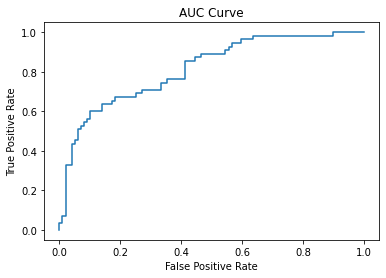

In [42]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
roc_auc_score(y_test,pos_probabs)